## Cohort Tracking with ehrapy
Important for many reasons

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ehrapy as ep
from tableone import TableOne
import seaborn as sns
import scanpy as sc

### Tableone
nice package

In [15]:
adata = ep.dt.diabetes_130(columns_obs_only=["gender", "race", "time_in_hospital_days"])
TableOne(adata.obs)

2024-02-15 09:11:49,986 - root INFO - Transformed passed DataFrame into an AnnData object with n_obs x n_vars = `101766` x `48`.


Missing       Overall
n                                                           101766
gender, n (%)                0.0                   3  54708 (53.8)
                             1.0                      47055 (46.2)
race, n (%)                  AfricanAmerican    2273  19210 (19.3)
                             Asian                       641 (0.6)
                             Caucasian                76099 (76.5)
                             Hispanic                   2037 (2.0)
                             Other                      1506 (1.5)
time_in_hospital_days, n (%) 1                     0  14208 (14.0)
                             10                         2342 (2.3)
                             11                         1855 (1.8)
                             12                         1448 (1.4)
                             13                         1210 (1.2)
                             14                         1042 (1.0)
                             2                        17224 (16.9)
                             3                        17756 (17.4)
                             4                        13924 (13.7)
                             5                          9966 (9.8)
                             6                          7539 (7.4)
                             7                          5859 (5.8)
                             8                          4391 (4.3)
                             9                          3002 (2.9)

### CohortTracker
A visualization aid automated in ehrapy: summarizing tableone information graphically.
Especially useful for cohort processing, as the overview component becomes even more important there

{'gender': {0.0: [53.8, 52.4], 1.0: [46.2, 47.6]}, 'race': {'AfricanAmerican': [19.3, 25.9], 'Asian': [0.6, 0.7], 'Caucasian': [76.5, 70.4], 'Hispanic': [2.0, 0.8], 'Other': [1.5, 2.2]}, 'time_in_hospital_days': ['4.4 (3.0)', '4.6 (3.2)']}


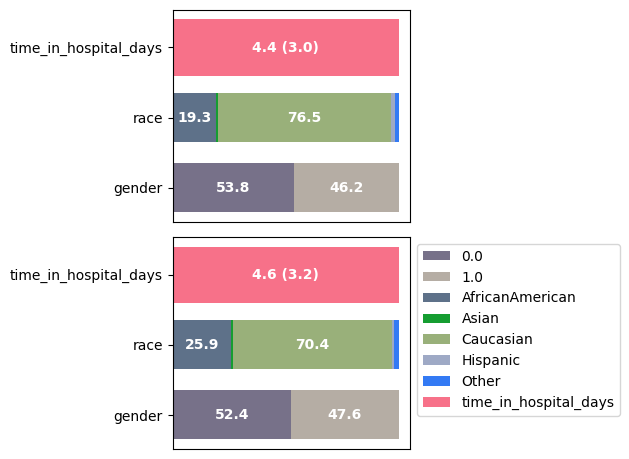

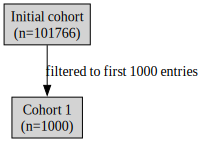

In [16]:
# instantiate the cohort tracker
pop_track = ep.tl.CohortTracker(adata, categorical=["gender", "race"])

# track the initial state of the dataset
pop_track(adata, label="Initial cohort")

# do a filtering step
adata = adata[:1000]

# track the filtered dataset
pop_track(adata, label="Cohort 1", operations_done="filtered to first 1000 entries")

print(pop_track.track)

# plot the change of the cohort
pop_track.plot_cohort_change()

# plot a flowchart
pop_track.plot_flowchart()

The tracking steps can be reset for convenience

In [17]:
pop_track.reset()

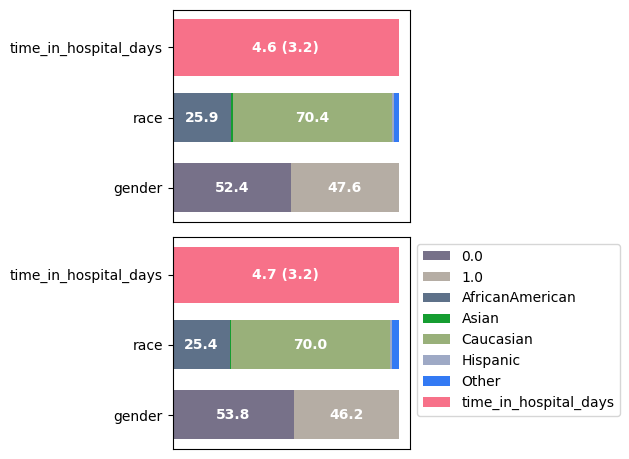

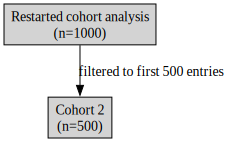

In [18]:
pop_track(adata, label="Restarted cohort analysis")
adata = adata[:500]
pop_track(adata, label="Cohort 2", operations_done="filtered to first 500 entries")
pop_track.plot_cohort_change()
pop_track.plot_flowchart()

Some nice plotting options are available

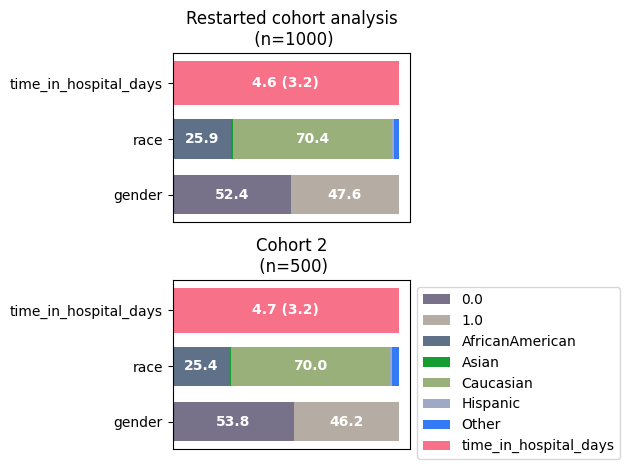

In [19]:
pop_track.plot_cohort_change(subfigure_title=True)